# Goal
Lets assume that all emission in the plateau phase is from He II and He I

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import astropy.table as table
import astropy.constants as aconst
import astropy.units as u

#import pyneb as pn

C_KM_S = aconst.c.to(u.km/u.s).value

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataloader as dataloader
import snelib19odp.const as const
import snelib19odp.cauchy as cauchy
import snelib19odp.blackbody as bb

In [33]:
#spec = dataloader.load_obs_spec('ZTF19abqwtfu_20190823_P60_v1.ascii', fluxcal=True)
spec = dataloader.load_obs_spec('ZTF19abqwtfu_20190823_NTT_v1.ascii', fluxcal=True)
#spec = dataloader.load_obs_spec('ZTF19abqwtfu_20190827_P200_v1.ascii', fluxcal=True)
#spec2 = table.Table.read('../data/comparison/PTF10aavz_2455536.50_P200_DBSP_PTF.clean', format='ascii')
spec2 = table.Table.read('../data/comparison/PTF10aavz_2455530.50_P200_DBSP_PTF.clean', format='ascii')

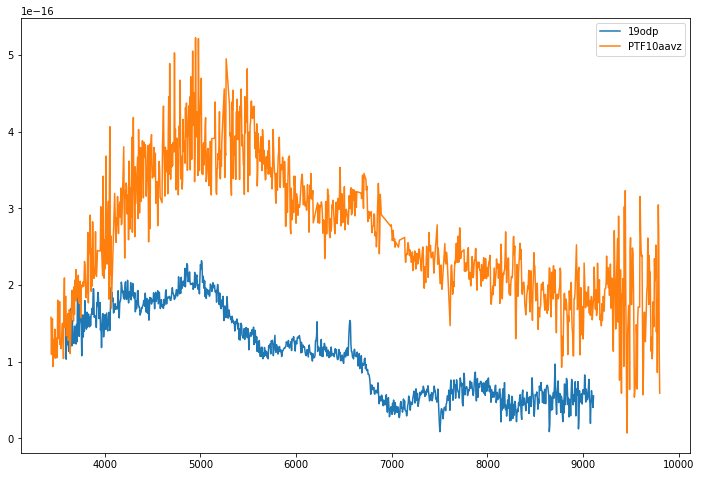

In [34]:
plt.figure(figsize=(12,8))
plt.plot(spec['restwave'], spec['flux'], label='19odp')
plt.plot(spec2['col1'], spec2['col2']*60e-16, label='PTF10aavz')
plt.legend()

offset: 6522.975024
width: 282.795640
offset: 6165.665564
width: 267.304923
offset: 5425.194797
width: 235.202715
offset: 4128.909314
width: 179.003836
offset: 3587.867083
width: 155.547609
offset: 4996.792757
width: 216.629866
offset: 4326.491289
width: 187.569762


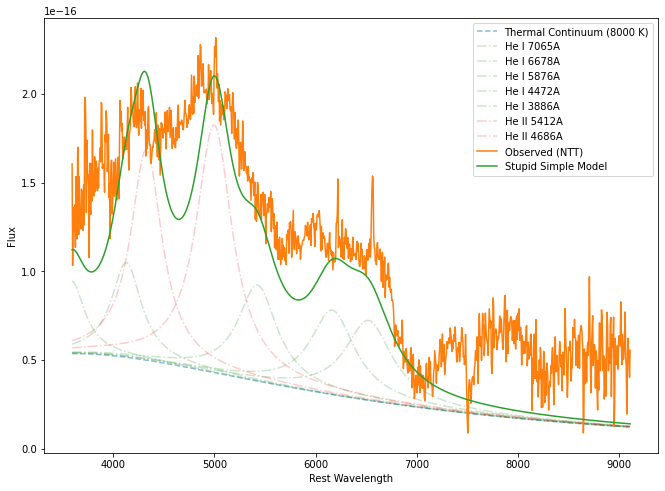

In [116]:
plt.figure(figsize=(11,8))

spec = dataloader.load_obs_spec('ZTF19abqwtfu_20190823_NTT_v1.ascii', fluxcal=True)

wave = spec['restwave']

flux = np.zeros(len(wave))

# params
#continuum = 0.5e-16
velocity_offset = -23e3
velocity_width = 12e3
temp = 8000

continuum = bb.bb(temp, 4e-24, wave)
plt.plot(wave, continuum, alpha=0.5, ls='--', label='Thermal Continuum (%.0f K)' % temp)

flux += continuum
#flux += bb.bb(temp, 4e-24, wave)

def add_line(center_wave, amplitude, name, color):
    wave_offset = center_wave * (1+velocity_offset/C_KM_S)
    wave_width = center_wave * (velocity_width/C_KM_S)
    print('offset: %f' % wave_offset)
    print('width: %f' % wave_width)
    #velocity = (spec['restwave'] - center_wave)/center_wave * C_KM_S
    line_flux = cauchy.cauchy(wave, wave_offset, amplitude, wave_width)
    plt.plot(wave, continuum+line_flux, alpha=0.2, ls='-.', label='%s %.0fA' % (name, center_wave), color=color)
    return line_flux
    

# He I lines
flux += add_line(7065, 4e-14, 'He I', 'green')
flux += add_line(6678, 4e-14, 'He I', 'green')
flux += add_line(5876, 4e-14, 'He I', 'green')
# option B: add those two lines
flux += add_line(4472, 3e-14, 'He I', 'green')
flux += add_line(3886, 2e-14, 'He I', 'green')

# He II lines
#flux += add_line(5412, 9e-14)
#flux += add_line(4686, 9e-14)
flux += add_line(5412, 9.5e-14, 'He II', 'red')
flux += add_line(4686, 7e-14, 'He II', 'red')



plt.plot(spec['restwave'], spec['flux'], label='Observed (NTT)')
plt.plot(wave, flux, label='Stupid Simple Model')
plt.xlabel('Rest Wavelength')
plt.ylabel('Flux')
plt.legend()
plt.savefig('../paper/plots/tmp_spec_plateau_he_ntt.png')

offset: 6687.939147
width: 282.795640
offset: 6321.593436
width: 267.304923
offset: 5562.396380
width: 235.202715
offset: 4233.328219
width: 179.003836
offset: 3678.603188
width: 155.547609
offset: 5123.160179
width: 216.629866
offset: 4435.906984
width: 187.569762


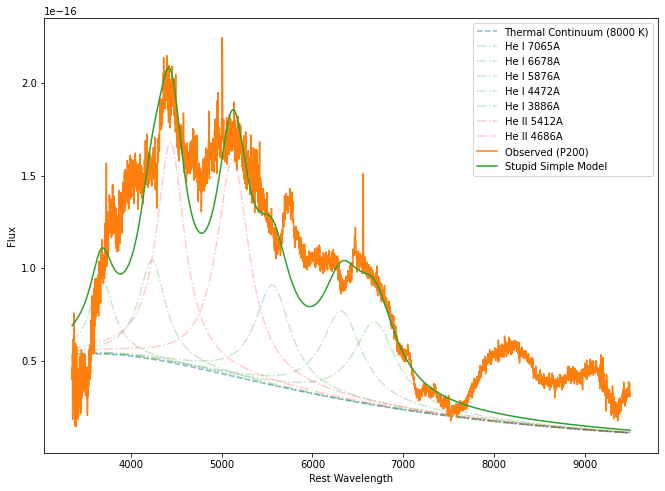

In [117]:
plt.figure(figsize=(11,8))

spec = dataloader.load_obs_spec('ZTF19abqwtfu_20190827_P200_v1.ascii', fluxcal=True)
idx = spec['restwave'] < 9500
wave = spec['restwave'][idx]

flux = np.zeros(len(wave))

# params
#continuum = 0.5e-16
velocity_offset = -16e3
velocity_width = 12e3
temp = 8000

continuum = bb.bb(temp, 4e-24, wave)
plt.plot(wave, continuum, alpha=0.5, ls='--', label='Thermal Continuum (%.0f K)' % temp)

flux += continuum

def add_line(center_wave, amplitude, name, color):
    wave_offset = center_wave * (1+velocity_offset/C_KM_S)
    wave_width = center_wave * (velocity_width/C_KM_S)
    print('offset: %f' % wave_offset)
    print('width: %f' % wave_width)
    #velocity = (spec['restwave'] - center_wave)/center_wave * C_KM_S
    line_flux = cauchy.cauchy(wave, wave_offset, amplitude, wave_width)
    plt.plot(wave, continuum+line_flux, alpha=0.2, ls='-.', label='%s %.0fA' % (name, center_wave), color=color)
    return line_flux
    

# He I lines
flux += add_line(7065, 4e-14, 'He I', 'green')
flux += add_line(6678, 4e-14, 'He I', 'green')
flux += add_line(5876, 4e-14, 'He I', 'green')
# option B: add those two lines
flux += add_line(4472, 3e-14, 'He I', 'green')
flux += add_line(3886, 2e-14, 'He I', 'green')

# He II lines
#flux += add_line(5412, 9e-14)
#flux += add_line(4686, 9e-14)
flux += add_line(5412, 8e-14, 'He II', 'red')
flux += add_line(4686, 7e-14, 'He II', 'red')



plt.plot(spec['restwave'][idx], spec['flux'][idx]/2.5, label='Observed (P200)')
plt.plot(wave, flux, label='Stupid Simple Model')
plt.xlabel('Rest Wavelength')
plt.ylabel('Flux')
plt.legend()
plt.savefig('../paper/plots/tmp_spec_plateau_he_p200.png')

offset: 6876.469573
width: 212.096730
offset: 6499.796718
width: 200.478692
offset: 5719.198190
width: 176.402036
offset: 5267.580089
width: 162.472399
offset: 4560.953492
width: 140.677322


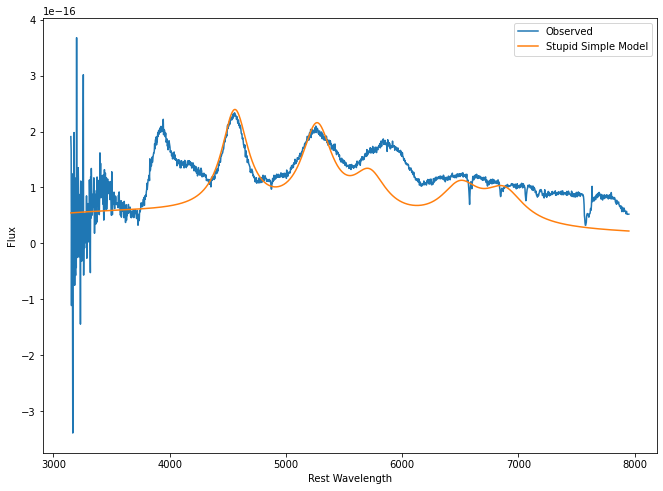

In [104]:
ptf13bvn = dataloader.load_comparison_json_specs('iPTF13bvn.json', phase0=56474)

plt.figure(figsize=(11,8))

#spec = dataloader.load_obs_spec('ZTF19abqwtfu_20190827_P200_v1.ascii', fluxcal=True)
spec = ptf13bvn[0]

wave = spec['restwave']

flux = np.zeros(len(wave))

# params
#continuum = 0.5e-16
velocity_offset = -8e3
velocity_width = 9e3
temp = 8000

#flux += continuum
flux += bb.bb(temp, 4e-24, wave)

def add_line(center_wave, amplitude):
    wave_offset = center_wave * (1+velocity_offset/C_KM_S)
    wave_width = center_wave * (velocity_width/C_KM_S)
    print('offset: %f' % wave_offset)
    print('width: %f' % wave_width)
    #velocity = (spec['restwave'] - center_wave)/center_wave * C_KM_S
    return cauchy.cauchy(wave, wave_offset, amplitude, wave_width)
    

# He I lines
flux += add_line(7065, 4e-14)
flux += add_line(6678, 4e-14)
flux += add_line(5876, 4e-14)
# option B: add those two lines
#flux += add_line(4472, 3e-14)
#flux += add_line(3886, 2e-14)

# He II lines
flux += add_line(5412, 8e-14)
flux += add_line(4686, 8e-14)
#flux += add_line(5412, 8e-14)
#flux += add_line(4686, 7e-14)



plt.plot(spec['restwave'], spec['flux']/3, label='Observed')
plt.plot(wave, flux, label='Stupid Simple Model')
plt.xlabel('Rest Wavelength')
plt.ylabel('Flux')
plt.legend()

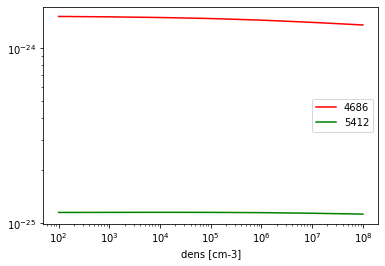

In [138]:
He2 = pn.RecAtom('He', 2)

V1_mult = (4686, 5412)
cols = 'rgbymckrgbymckr'
temps = 1e4
dens = np.logspace(2, 8, 30)
f, ax = plt.subplots()
for j, label in enumerate(V1_mult):
    ax.loglog(dens, He2.getEmissivity(temps, dens, wave=label), label=label, c=cols[j])
ax.set_xlabel('dens [cm-3]')
ax.legend(loc='best');

In [136]:
He2.getTransition(wave=5412)

(7, 4)

In [131]:
He2 = pn.Atom('He', 1)

warng _ManageAtomicData: atom data not available for He1
warng _ManageAtomicData: coll data not available for He1


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

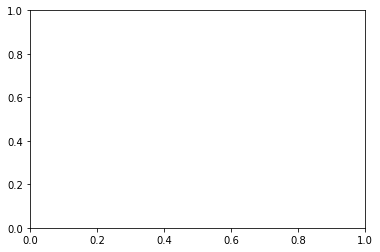

In [130]:
He2.plotGrotrian()